## Analysis

#### Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,pathlib,sys,warnings
warnings.filterwarnings('ignore')
sys.path.append("/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate")
from tqdm import tqdm
import json
import functions.software_commands as software_commands
import functions.statistics as statistics
import defaults

### Stored Videos

In [3]:
# Path
stored_videos_path = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/stored_videos"

File2Metadata = {}

for resolution in [(1920,1080), (1280,720)]:
	resolution_string = "{}x{}".format(resolution[0], resolution[1])
	File2Metadata[resolution_string] = {}
	
	for fps in [30,20,10]:
		File2Metadata[resolution_string][int(fps)] = {}
		
		for bitrate in reversed([4, 3, 2.75, 2.5, 2.25, 2, 1.75, 1.5, 1.25, 1, 0.75, 0.5, 0.25]):
			File2Metadata[resolution_string][int(fps)][bitrate] = {}

			for video_file in os.listdir(stored_videos_path):
				File2Metadata[resolution_string][int(fps)][bitrate][os.path.splitext(video_file)[0]] = {}


# Information to Mode
Info2Mode = {}
Mode2Info = {}
for i,complexity in enumerate([(False, False), (True, False), (False, True), (True, True)]):
	Info2Mode[complexity] = i
	Mode2Info[i] = complexity

### Simulated Compressed Videos

In [7]:
# Paths
compressed_videos_segments_dir = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/compressed_video_segments"

# Compressed videos for different resolution, fps and bitrates
for resolution in [(1920,1080), (1280,720)]:
	resolution_string = "{}x{}".format(resolution[0], resolution[1])
	
	for fps in [30,20,10]:
		for bitrate in [4, 3, 2.75, 2.5, 2.25, 2, 1.75, 1.5, 1.25, 1, 0.75, 0.5, 0.25]:
			# For each compressed video
			compressed_videos_setting_dir = os.path.join(compressed_videos_segments_dir, resolution_string, str(int(fps)), str(bitrate))
			quality_dir = os.path.join(defaults.quality_scores, resolution_string, str(int(fps)), str(bitrate))
			
			for video_file in os.listdir(compressed_videos_setting_dir):	
				filemetadata = os.path.splitext(video_file)[0].split("_")
				original_filename = "_".join(filemetadata[:2])
				part = int(filemetadata[-1])
				mode = int(filemetadata[0][-1])
				
				resolution, fps, b, q = statistics.get_statistics(
					video_path=os.path.join(compressed_videos_setting_dir, video_file),
					quality_dir=quality_dir
				)

				scene_complexity, vehicle_info = Mode2Info[mode]

				File2Metadata[resolution_string][int(fps)][bitrate][original_filename][part] = [fps, b, q, scene_complexity, vehicle_info]

#### Metrics over Time

Plotting Metrics vs Time

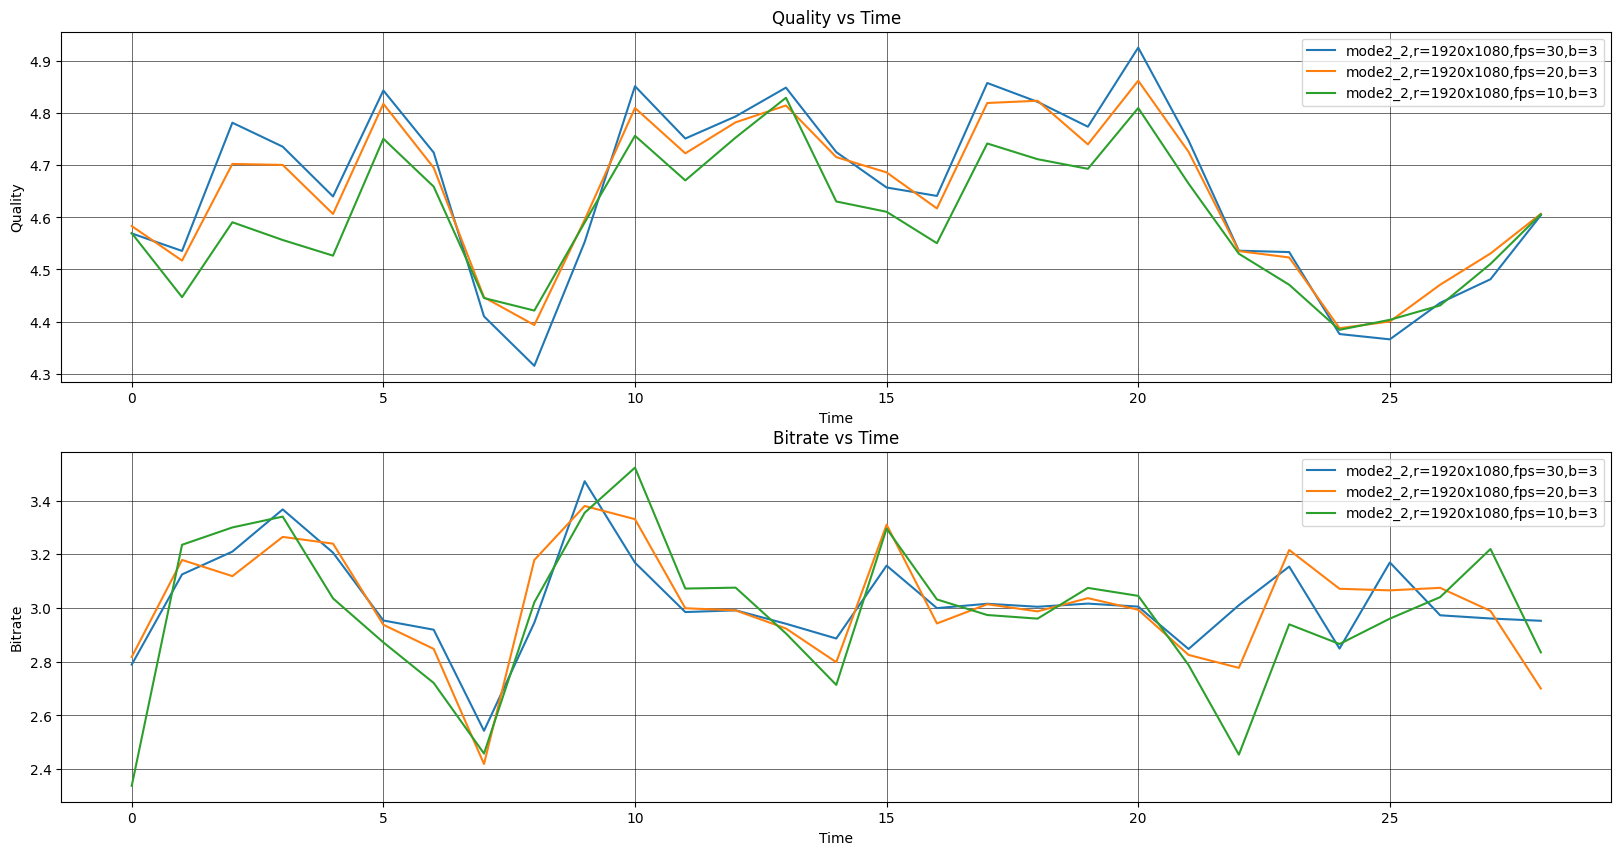

In [51]:
# Necessary
Metric2Index = {"resolution":0, "fps":1, "bitrate":2, "quality": 3, "quality/bitrate": 4}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Setting
scene_complexity = False
vehicle_info = True
filenum = 2
original_filename = "mode{}_{}".format(Info2Mode[(scene_complexity, vehicle_info)], filenum)

metrics = ["Quality", "Bitrate"]

# Settings
settings = [("1920x1080", 30, 3), ("1920x1080", 20, 3), ("1920x1080", 10, 3)]

# Plotting Seperately
plt.figure(figsize=(20,5*len(metrics)))
for i,metric in enumerate(metrics):
    # Plot
    plt.subplot(len(metrics), 1, i+1)
    plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
    plt.grid(which='minor', linestyle='-', linewidth='0.4', color='black')
    plt.title("{} vs Time".format(metric))
    plt.xlabel("Time")
    plt.ylabel(metric)
    
    for setting in settings:
        resolution_string = setting[0]
        fps = setting[1]
        bitrate = setting[2]
        data = File2Metadata[resolution_string][int(fps)][bitrate][original_filename]
        data = dict(sorted(data.items()))

        time = np.asarray(list(data.keys()))
        metadata = np.asarray(list(data.values()))

        if metric == "Quality":
            metric_values = metadata[:, 2]
        elif metric == "Bitrate":
            metric_values = metadata[:, 1]
        else:
            metric_values = metadata[:, 0]

        plt.plot(time, metric_values, label="{},r={},fps={},b={}".format(original_filename,resolution_string,fps,bitrate))

    plt.legend()

plt.show()

### Distribution of Quality Scores

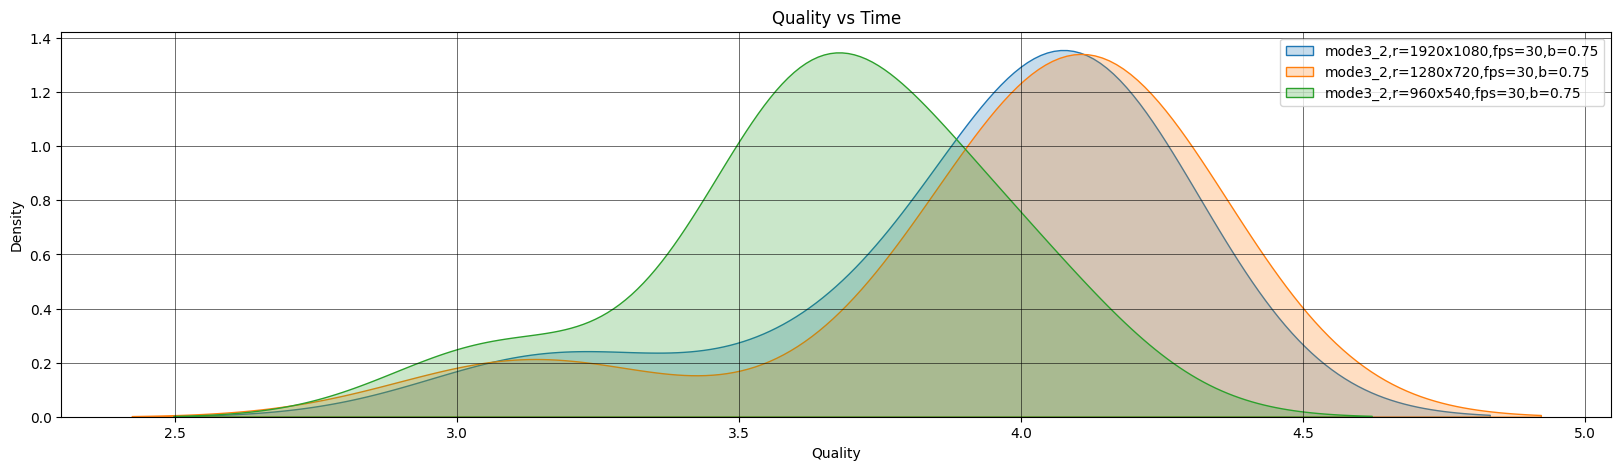

In [62]:
# Necessary
Metric2Index = {"resolution":0, "fps":1, "bitrate":2, "quality": 3, "quality/bitrate": 4}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Setting
scene_complexity = True
vehicle_info = True
filenum = 2
original_filename = "mode{}_{}".format(Info2Mode[(scene_complexity, vehicle_info)], filenum)

metrics = ["Quality"]

# Settings
settings = [("1920x1080", 30, 0.75), ("1280x720", 30, 0.75), ("960x540", 30, 0.75)]

# Plotting Seperately
plt.figure(figsize=(20,5*len(metrics)))
for i,metric in enumerate(metrics):
    # Plot
    plt.subplot(len(metrics), 1, i+1)
    plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
    plt.grid(which='minor', linestyle='-', linewidth='0.4', color='black')
    plt.title("{} vs Time".format(metric))
    plt.xlabel(metric)
    
    for setting in settings:
        resolution_string = setting[0]
        fps = setting[1]
        bitrate = setting[2]
        data = File2Metadata[resolution_string][int(fps)][bitrate][original_filename]
        data = dict(sorted(data.items()))

        time = np.asarray(list(data.keys()))
        metadata = np.asarray(list(data.values()))

        if metric == "Quality":
            metric_values = metadata[:, 2]
        elif metric == "Bitrate":
            metric_values = metadata[:, 1]
        else:
            metric_values = metadata[:, 0]

        sns.kdeplot(data=metric_values, label="{},r={},fps={},b={}".format(original_filename,resolution_string,fps,bitrate), fill=True)

    plt.legend()
    plt.show()